In [4]:
#Dataset http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2020-09-24 12:36:06--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-09-24 12:36:06--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-09-24 12:36:08--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-09-24 12:36:08--  https://www.dropbox.com/s/raw/7

In [5]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
#let's define the Train and Validation dataset
trainDir = 'CovidDataset/Train'
valDir = 'CovidDataset/Val'

In [ ]:
#Let's import few libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import *
from keras.preprocessing import image
from keras.losses import binary_crossentropy

In [ ]:
#let's create the CNN Model

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=binary_crossentropy,optimizer='adam',metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
trainDatagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

testDatagen = image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
testDatagen = image.ImageDataGenerator(
    
)

In [ ]:
trainGenerator = trainDatagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size=32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
trainGenerator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validationGenerator = testDatagen.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
validationGenerator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
def plotImages(images):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()

  for img,ax in zip(images,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

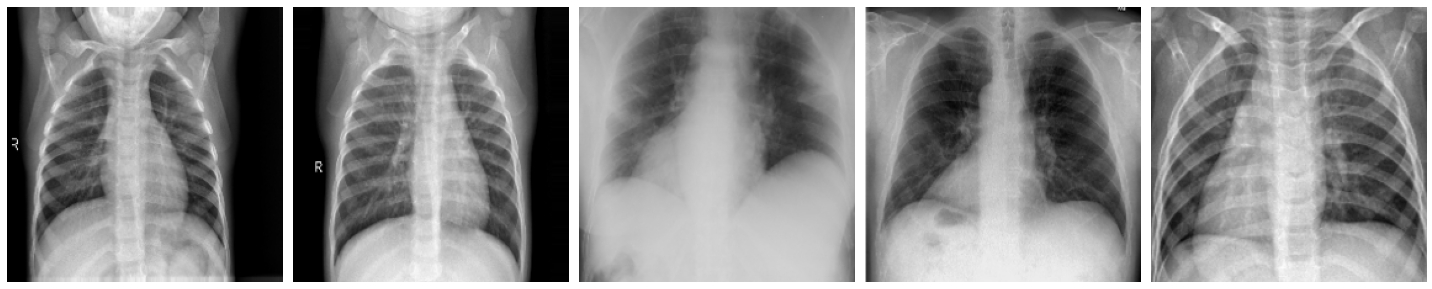

In [ ]:
sampleTrainingImges,_ = next(trainGenerator)
plotImages(sampleTrainingImges[:5])

In [ ]:
#fit_generator--->If we have ImageDataGenerator for our Image dataset creation
hist = model.fit_generator(trainGenerator,
                           steps_per_epoch = 6,
                           epochs=10,
                           validation_data=validationGenerator,
                           validation_steps = 2
                           )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 52s 9s/step - loss: 3.0134 - accuracy: 0.5104 - val_loss: 5.6696 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 51s 8s/step - loss: 0.6559 - accuracy: 0.5990 - val_loss: 34.9132 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 51s 9s/step - loss: 0.5909 - accuracy: 0.6979 - val_loss: 4.3440 - val_accuracy: 0.9333
Epoch 4/10
6/6 [==============================] - 51s 8s/step - loss: 0.5350 - accuracy: 0.7500 - val_loss: 19.3753 - val_accuracy: 0.7667
Epoch 5/10
6/6 [==============================] - 54s 9s/step - loss: 0.4163 - accuracy: 0.8125 - val_loss: 8.0737 - val_accuracy: 0.9333
Epoch 6/10
6/6 [==============================] - 51s 9s/step - loss: 0.2238 - accuracy: 0.9167 - val_loss: 12.4608 - val_accuracy: 0.9500
Epoch 7/10
6/6 [==============================] - 51s 9s/step - loss: 0.1924 - accuracy: 0.91

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
ephocs_range = range(10)


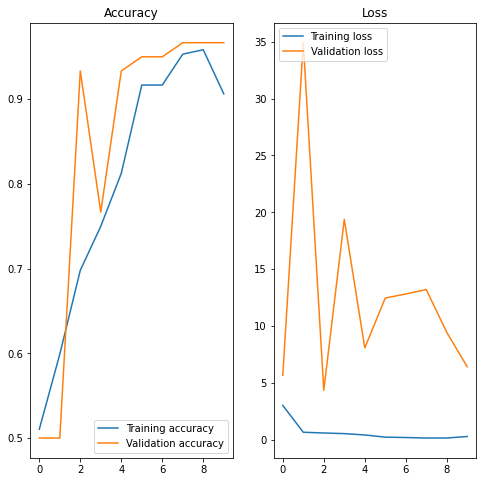

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(ephocs_range,acc,label='Training accuracy')
plt.plot(ephocs_range,val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(ephocs_range,loss,label='Training loss')
plt.plot(ephocs_range,val_loss,label='Validation loss')
plt.legend(loc='upper left')
plt.title('Loss')

plt.show()


In [ ]:
#Let's save the model
model.save('/content/drive/My Drive/COVID19 Detection/model_cov.h5')

In [ ]:
model.evaluate_generator(trainGenerator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.16188214719295502, 0.9419642686843872]

In [ ]:
model.evaluate_generator(validationGenerator)

[6.4085235595703125, 0.9666666388511658]

In [7]:
import os
import numpy as np

In [1]:
## Let's test

from tensorflow.keras.models import load_model
import cv2



In [2]:
model = load_model("/content/drive/My Drive/COVID19 Detection/model_cov.h5")
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
#Let's test few normal images

img = cv2.imread("/content/CovidDataset/Val/Covid/41591_2020_819_Fig1_HTML.webp-day10.png")
img = cv2.resize(img,(224,224))
img = np.reshape(img,(1,224,224,3))

In [9]:
classes = model.predict_classes(img)
clas = int(classes)
label = ["COVID INFECTED","NORMAL"]
label[clas]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


'COVID INFECTED'

In [12]:
import cv2
import numpy as np
def importAndPredict(imgl,model):
  print(imgl)
  img = cv2.resize(np.float32(imgl),(224,224))
  img = np.reshape(img,(1,224,224,3))
  classes = int(model.predict(img))
  label = ["COVID INFECTED","NORMAL"]
  # covid.append(classes)
  return label[classes]

In [13]:
model = tf.keras.models.load_model('/content/drive/My Drive/COVID19 Detection/model_cov.h5')
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

importAndPredict('/content/CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg',model)

/content/CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg


ValueError: ignored

In [11]:

#Let's see for positive image
covid = []
img = cv2.imread("/content/CovidDataset/Val/Covid/41591_2020_819_Fig1_HTML.webp-day10.png")
print(img.shape)
img = cv2.resize(img,(224,224))
img = np.reshape(img,(1,224,224,3))
classes = int(model.predict(img))
label = ["COVID INFECTED","NORMAL"]
# covid.append(classes)
print(label[classes])

(249, 255, 3)
COVID INFECTED


In [12]:
!pip install streamlit

     |████████████████████████████████| 7.2MB 7.5MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 4.4MB 45.4MB/s 
     |████████████████████████████████| 112kB 51.8MB/s 
     |████████████████████████████████| 122kB 41.1MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=a8b67995db1973d21f136077ea08a9c03b79bdcc71bb86d82d3cd6e4ce197522
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=f7ec9c3f7e04bfbdf07cf76d8cab2017b962a074926fd3054f25df27fd1fb8ad
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=44d4ef664cbb408fefaa5a18fc4e641131ad79337c816cc76a43ae555b19da25
  Stored in directory: /root/.cache/pip/wheel

In [1]:
import streamlit as st
import tensorflow as tf

In [26]:
import os
Imgpath = '/content/CovidDataset/Val'
print(os.listdir(Imgpath))
for u in os.listdir(Imgpath):
  path = os.path.join(Imgpath,u)
  for k in os.listdir(path):
    path2 = os.path.join(path,k)
    img = cv2.imread(path2)
    img = cv2.resize(img,(224,224))

['Normal', 'Covid']


In [30]:
#Let's create a webapp


%%writefile app.py

import streamlit as st
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image,ImageOps

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/drive/My Drive/COVID19 Detection/model_cov.h5')
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model
model = load_model()

st.title('Covid19 Test Using the Chest X-ray')
st.header("This application is built using ML & DL Algorithm.")

file = st.file_uploader('Upload your chest X-ray',type=['jpg','jpeg','png'])
# file = cv2.imread(file)
# st.success(file)


def importAndPredict(img,model):
  # img = img.getdata()
  # img = np.array(img)
  # img = img.astype('uint8')
  img = cv2.resize(np.float32(img),(224,224))
  img = np.reshape(img,(1,224,224,3))
  classes = int(model.predict(img))
  label = ["COVID INFECTED","NORMAL"]
  # covid.append(classes)
  return label[classes]

if file is None:
  st.text('Please upload your image first.')
else:
  img = Image.open(file)
  # st.success(img)
  # img = cv2.imread(file)
  # img = cv2.resize(np.float32(img),(224,224))
  st.image(img,use_column_width=True)
 
  prediction = importAndPredict(img,model)
  st.success(prediction)

Overwriting app.py


In [ ]:
file = st.file_uploader('Upload your chest X-ray',type=['jpg','jpeg','png'])

In [ ]:
/path/to/ngrok.zip

SyntaxError: ignored

In [4]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.12-cp36-none-any.whl size=16810 sha256=5bd5814470b16babfa5504454a9f6546f6aa4637008d7b616c5062b07773482c
  Stored in directory: /root/.cache/pip/wheels/69/c3/d6/6968dd4d831794d41c311be1d7af6f4ac151c5d3bd0e6efab8
Successfully built pyngrok


In [5]:
!ngrok authtoken 1hvHcbfTc335UBllbD7smoufhQc_o9umsxfzRtxf4arPb9QU

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [6]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [7]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

2020-09-24 12:41:07.209 INFO    pyngrok.process: ngrok process starting: 477
2020-09-24 12:41:07.228 INFO    pyngrok.process: t=2020-09-24T12:41:07+0000 lvl=info msg="no configuration paths supplied"

2020-09-24 12:41:07.230 INFO    pyngrok.process: t=2020-09-24T12:41:07+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml

2020-09-24 12:41:07.232 INFO    pyngrok.process: t=2020-09-24T12:41:07+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil

2020-09-24 12:41:07.238 INFO    pyngrok.process: t=2020-09-24T12:41:07+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040

2020-09-24 12:41:07.671 INFO    pyngrok.process: t=2020-09-24T12:41:07+0000 lvl=info msg="tunnel session started" obj=tunnels.session

2020-09-24 12:41:07.673 INFO    pyngrok.process: t=2020-09-24T12:41:07+0000 lvl=info msg="client session established" obj=csess id=941ddbb1080b

2020-09-24 12:41:07.686 INFO    pyngrok.process: ngrok process has s

'http://bed36aa948c2.ngrok.io'